In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

from tensorflow.keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

import os

In [3]:
# Check if the folder exists
def getPic(folder_path):
    imgs=[]
    if os.path.exists(folder_path):
        # Get a list of all files in the folder
        files = os.listdir(folder_path)

        # Filter the list to keep only image files (e.g., .jpg, .png)
        image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff'))]

        if len(image_files) > 0:
            for image_file in image_files:
                # Construct the full path to the image
                image_path = os.path.join(folder_path, image_file)

                # Read the image using cv2.imread
                img = cv2.imread(image_path)

                if img is not None:
                    # Process the image here
                    # img contains the loaded image
                    imgs.append(img)
                    # You can display the image using cv2.imshow or perform any other operations

                else:
                    print(f"Unable to read image: {image_path}")
        else:
            print("No image files found in the folder.")
    else:
        print("Folder not found.")

    # Don't forget to release any OpenCV windows if you displayed images using cv2.imshow
    cv2.destroyAllWindows()
    return imgs

In [4]:
# Replace 'folder_path' with the path to your folder containing images
ip_cat = 'C:/Users/Wiiil/OneDrive/Documents/Git/image processing/project/aug_ip_cat'
ip_dog = 'C:/Users/Wiiil/OneDrive/Documents/Git/image processing/project/aug_ip_dog'


cats=getPic(ip_cat)
dogs=getPic(ip_dog)

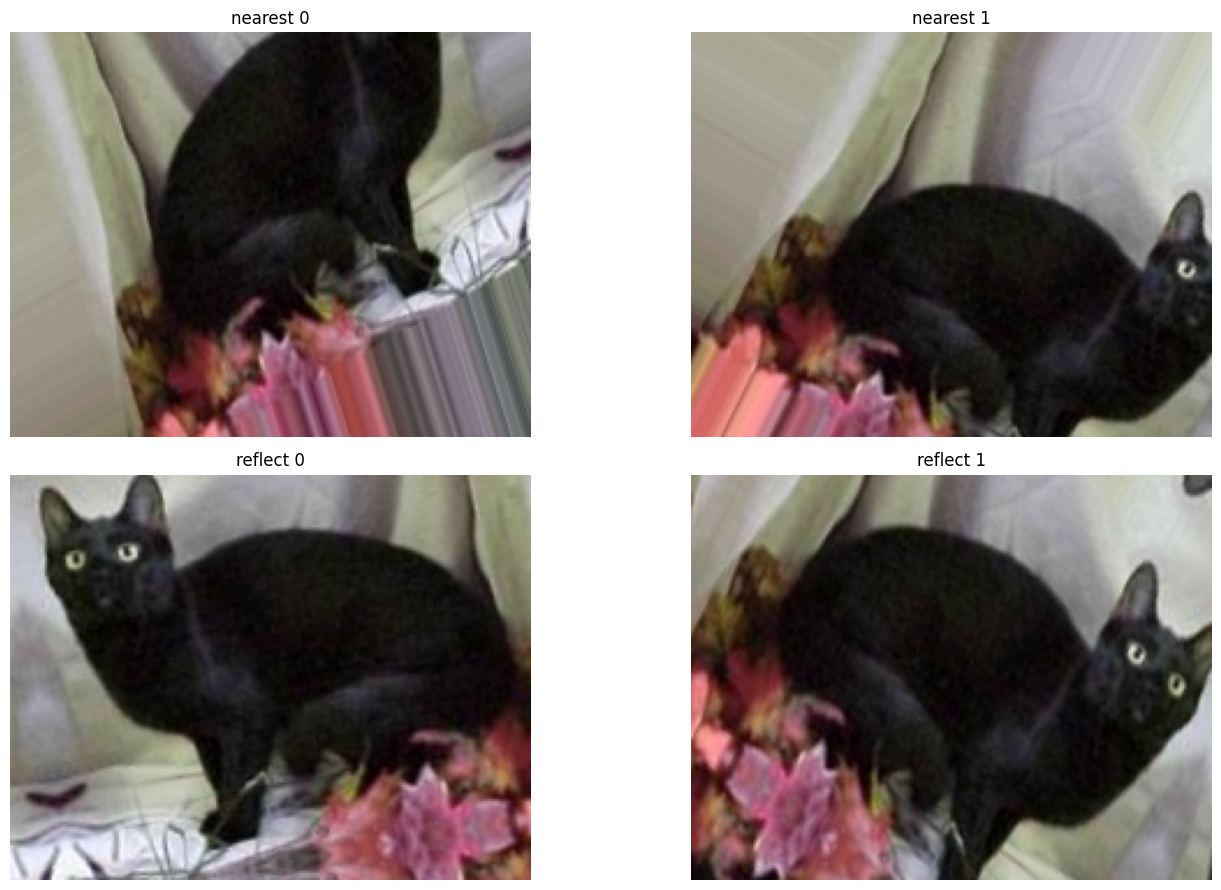

In [5]:
op_cat_folder = 'C:/Users/Wiiil/OneDrive/Documents/Git/image processing/project/aug_op_cat'
op_dog_folder = 'C:/Users/Wiiil/OneDrive/Documents/Git/image processing/project/aug_op_dog'

# Function to add Gaussian noise to an image
def add_gaussian_noise(img):
    mean = 0
    sigma = 0.2  # You can adjust the standard deviation for your noise
    gaussian_noise = np.random.normal(mean, sigma, img.shape).astype('uint8')
    img_noisy = img+ gaussian_noise

    return img_noisy

# Define augmentation parameters
Npic = 2  # Number of augmented images to generate
rotation_range = 40  # Degree range for random rotations
width_shift_range = 0.2  # Fraction of total width for horizontal shifts
height_shift_range = 0.2  # Fraction of total height for vertical shifts
shear_range = 0.2  # Shear angle in radians
zoom_range = 0.2  # Random zoom-in/out range
horizontal_flip = True  # Randomly flip images horizontally

# Define fill modes
fill_modes = ['nearest', 'reflect']#'constant', , 'wrap'

# Load your original image (replace 'your_image.jpg' with your image file)

# Expand the dimensions to match batch_size
# Create subplots
num_rows = len(fill_modes)
num_cols = Npic

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 9))


# Create an ImageDataGenerator with parameters
for (cnt,e) in enumerate(cats):
    
    e = np.expand_dims(e, axis=0)
    for(i,fill_mode) in enumerate(fill_modes):
        datagen = ImageDataGenerator(
            rotation_range=rotation_range,
            width_shift_range=width_shift_range,
            height_shift_range=height_shift_range,
            shear_range=shear_range,
            zoom_range=zoom_range,
            horizontal_flip=horizontal_flip,
            preprocessing_function=add_gaussian_noise,  # Apply Gaussian noise
            fill_mode=fill_mode
        )

        # Generate augmented images and save them (modify this part based on your requirements)
        # print(original_img.shape)
        for j in range(Npic):

            pic = datagen.flow(e, batch_size=1)
            batch = pic.next()
            im_result = batch[0].astype('uint8')
            axes[i, j].imshow(cv2.cvtColor(im_result, cv2.COLOR_BGR2RGB))
            axes[i, j].set_title(f"{fill_mode} {j}")
            axes[i, j].axis('off')
            # s = 'cat_aug_' + str(cnt)+'_'+str(j)+'_'+str(fill_mode) + '.jpg'
            # output_file = os.path.join(op_cat_folder, s)
            # cv2.imwrite(output_file, im_result)

plt.tight_layout()
plt.show()



In [16]:

# # Function to add Gaussian noise to an image
# def add_gaussian_noise(img):
#     mean = 0
#     sigma = 0.2  # You can adjust the standard deviation for your noise
#     gaussian_noise = np.random.normal(mean, sigma, img.shape).astype('uint8')
#     img_noisy = img+ gaussian_noise

#     return img_noisy

# # Define augmentation parameters
# Npic = 2  # Number of augmented images to generate
# rotation_range = 40  # Degree range for random rotations
# width_shift_range = 0.2  # Fraction of total width for horizontal shifts
# height_shift_range = 0.2  # Fraction of total height for vertical shifts
# shear_range = 0.2  # Shear angle in radians
# zoom_range = 0.2  # Random zoom-in/out range
# horizontal_flip = True  # Randomly flip images horizontally

# # Define fill modes
# fill_modes = ['nearest', 'reflect']#'constant', , 'wrap'

# # Load your original image (replace 'your_image.jpg' with your image file)

# # Expand the dimensions to match batch_size
# # Create subplots
# num_rows = len(fill_modes)
# num_cols = Npic



# # Create an ImageDataGenerator with parameters
# for (cnt,e) in enumerate(dogs):
    
#     e = np.expand_dims(e, axis=0)
#     for(i,fill_mode) in enumerate(fill_modes):
#         datagen = ImageDataGenerator(
#             rotation_range=rotation_range,
#             width_shift_range=width_shift_range,
#             height_shift_range=height_shift_range,
#             shear_range=shear_range,
#             zoom_range=zoom_range,
#             horizontal_flip=horizontal_flip,
#             preprocessing_function=add_gaussian_noise,  # Apply Gaussian noise
#             fill_mode=fill_mode
#         )

#         # Generate augmented images and save them (modify this part based on your requirements)
#         # print(original_img.shape)
#         for j in range(Npic):
            
#             pic = datagen.flow(e, batch_size=1)
#             batch = pic.next()
#             im_result = batch[0].astype('uint8')
#             # axes[i, j].imshow(cv2.cvtColor(im_result, cv2.COLOR_BGR2RGB))
#             # axes[i, j].set_title(f"{fill_mode} {j}")
#             # axes[i, j].axis('off')
#             s = 'dog_aug_' + str(cnt)+'_'+str(j)+'_'+str(fill_mode) + '.jpg'
#             output_file = os.path.join(op_dog_folder, s)
#             cv2.imwrite(output_file, im_result)



